## Imports

In [1]:

import random
import pandas as pd 

import torch
from torchvision import datasets, transforms

#quanutm lib
import pennylane as qml
from pennylane import numpy as np

from pennylane.optimize import AdamOptimizer

import torch
from torchvision import datasets, transforms

C:\Users\tomut\anaconda3\envs\qhack2022\lib\site-packages\torchvision\io\image.py:11: UserWarning: Failed to load image Python extension: Could not find module 'C:\Users\tomut\anaconda3\envs\qhack2022\Lib\site-packages\torchvision\image.pyd' (or one of its dependencies). Try using the full path with constructor syntax.
  warn(f"Failed to load image Python extension: {e}")


In [2]:
import sys
sys.path.append("..") # Adds higher directory to python modules path

from qencode.initialize import setAB_amplitude, setAux, setEnt
from qencode.encoders import e2_classic
from qencode.training_circuits import swap_t
from qencode.qubits_arrangement import QubitsArrangement

from qencode.utils.mnist import get_dataset

## Data

In [3]:
df=pd.read_csv("cancer.csv", nrows=500)
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       500 non-null    int64  
 1   diagnosis                500 non-null    object 
 2   radius_mean              500 non-null    float64
 3   texture_mean             500 non-null    float64
 4   perimeter_mean           500 non-null    float64
 5   area_mean                500 non-null    float64
 6   smoothness_mean          500 non-null    float64
 7   compactness_mean         500 non-null    float64
 8   concavity_mean           500 non-null    float64
 9   concave points_mean      500 non-null    float64
 10  symmetry_mean            500 non-null    float64
 11  fractal_dimension_mean   500 non-null    float64
 12  radius_se                500 non-null    float64
 13  texture_se               500 non-null    float64
 14  perimeter_se             5

In [5]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.000000e+02,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,...,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,0.0
mean,3.263049e+07,14.224206,19.086320,92.606620,662.844800,0.095978,0.103948,0.089941,0.049446,0.181370,...,25.508500,108.258320,896.003200,0.131972,0.256324,0.276420,0.115980,0.292212,0.083778,NaN
std,1.326933e+08,3.476809,4.164842,23.983476,349.357241,0.013666,0.053096,0.080259,0.038875,0.027716,...,6.063133,33.312706,571.074422,0.022739,0.159147,0.209012,0.065896,0.063366,0.018108,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.062510,0.019380,0.000000,0.000000,0.116700,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.667040e+05,11.807500,16.070000,75.995000,430.550000,0.085992,0.063622,0.028885,0.020245,0.161875,...,21.017500,84.567500,522.600000,0.116200,0.145925,0.114475,0.063302,0.251700,0.071270,NaN
50%,9.014320e+05,13.435000,18.680000,86.735000,556.150000,0.095825,0.091280,0.064315,0.033870,0.179550,...,25.240000,97.980000,691.750000,0.131250,0.214850,0.231400,0.100650,0.283100,0.079900,NaN
75%,8.910808e+06,16.115000,21.562500,106.225000,800.775000,0.105100,0.130500,0.132150,0.074928,0.195625,...,29.350000,127.150000,1150.750000,0.146000,0.343525,0.389450,0.166850,0.320050,0.092065,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.144700,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [6]:
#Data seams pretty clean  without any nan value 

In [7]:
## engineering two new features to have 32 feutures that can be encoded om 5 qubits.
over_average = []
under_average = []

mean = {}
std = {}
for col in df:
     if col not in ["id","diagnosis" ]:
        mean[col]=df[col].mean()
        std[col]=df[col].std()

for index,row in df.iterrows():
    o_average=0
    u_average=0
    for col in df:
        if col not in ["id","diagnosis" ]:
            if  row[col]> mean[col]+2* std[col]:
                o_average = o_average + 1
            if  row[col]< mean[col]+2* std[col]:
                u_average= u_average + 1
                
    over_average.append(o_average)
    under_average.append(u_average)

df["over_average"] = over_average
df["under_average"] = under_average

df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32,over_average,under_average
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN,13,17
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN,0,30
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN,1,29
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN,12,18
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN,0,30


In [8]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32,over_average,under_average
count,5.000000e+02,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,...,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,0.0,500.000000,500.000000
mean,3.263049e+07,14.224206,19.086320,92.606620,662.844800,0.095978,0.103948,0.089941,0.049446,0.181370,...,896.003200,0.131972,0.256324,0.276420,0.115980,0.292212,0.083778,NaN,1.250000,28.750000
std,1.326933e+08,3.476809,4.164842,23.983476,349.357241,0.013666,0.053096,0.080259,0.038875,0.027716,...,571.074422,0.022739,0.159147,0.209012,0.065896,0.063366,0.018108,NaN,2.811282,2.811282
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.062510,0.019380,0.000000,0.000000,0.116700,...,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN,0.000000,10.000000
25%,8.667040e+05,11.807500,16.070000,75.995000,430.550000,0.085992,0.063622,0.028885,0.020245,0.161875,...,522.600000,0.116200,0.145925,0.114475,0.063302,0.251700,0.071270,NaN,0.000000,29.000000
50%,9.014320e+05,13.435000,18.680000,86.735000,556.150000,0.095825,0.091280,0.064315,0.033870,0.179550,...,691.750000,0.131250,0.214850,0.231400,0.100650,0.283100,0.079900,NaN,0.000000,30.000000
75%,8.910808e+06,16.115000,21.562500,106.225000,800.775000,0.105100,0.130500,0.132150,0.074928,0.195625,...,1150.750000,0.146000,0.343525,0.389450,0.166850,0.320050,0.092065,NaN,1.000000,30.000000
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.144700,0.345400,0.426800,0.201200,0.304000,...,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN,20.000000,30.000000


In [9]:
for col in df:
    if col not in ["id","diagnosis" ]:
        df[col]=df[col]/df[col].max()
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32,over_average,under_average
count,5.000000e+02,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,...,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,0.0,500.000000,500.000000
mean,3.263049e+07,0.506019,0.485904,0.491282,0.265032,0.663292,0.300949,0.210733,0.245754,0.596612,...,0.210626,0.592867,0.242273,0.220783,0.398557,0.440211,0.403749,NaN,0.062500,0.958333
std,1.326933e+08,0.123686,0.106030,0.127233,0.139687,0.094446,0.153722,0.188047,0.193216,0.091171,...,0.134244,0.102153,0.150423,0.166943,0.226448,0.095459,0.087266,NaN,0.140564,0.093709
min,8.670000e+03,0.248346,0.247200,0.232308,0.057377,0.431997,0.056109,0.000000,0.000000,0.383882,...,0.043535,0.319721,0.025794,0.000000,0.000000,0.235764,0.265253,NaN,0.000000,0.333333
25%,8.667040e+05,0.420046,0.409114,0.403156,0.172151,0.594281,0.184199,0.067678,0.100621,0.532484,...,0.122849,0.522013,0.137925,0.091434,0.217534,0.379180,0.343470,NaN,0.000000,0.966667
50%,9.014320e+05,0.477944,0.475560,0.460133,0.222371,0.662232,0.264273,0.150691,0.168340,0.590625,...,0.162612,0.589623,0.203072,0.184824,0.345876,0.426484,0.385060,NaN,0.000000,1.000000
75%,8.910808e+06,0.573284,0.548943,0.563528,0.320182,0.726330,0.377823,0.309630,0.372403,0.643503,...,0.270510,0.655885,0.324693,0.311062,0.573368,0.482148,0.443687,NaN,0.050000,1.000000
max,9.113205e+08,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,NaN,1.000000,1.000000


In [10]:
malign=df[df["diagnosis"]=="M"]
malign.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32,over_average,under_average
0,842302,M,0.639986,0.264257,0.651459,0.400240,0.818245,0.803706,0.703140,0.731113,...,0.474612,0.728661,0.629112,0.568610,0.912027,0.693130,0.573012,NaN,0.65,0.566667
1,842517,M,0.731768,0.452393,0.705040,0.530188,0.585625,0.227678,0.203608,0.348757,...,0.459803,0.556155,0.176371,0.192971,0.639175,0.414281,0.429012,NaN,0.00,1.000000
2,84300903,M,0.700462,0.540988,0.689655,0.481008,0.757429,0.462942,0.462512,0.635686,...,0.401740,0.648697,0.401229,0.359744,0.835052,0.544290,0.422072,NaN,0.05,0.966667
3,84348301,M,0.406261,0.518839,0.411565,0.154378,0.984796,0.821946,0.565604,0.522863,...,0.133451,0.942498,0.818809,0.548642,0.884880,1.000000,0.833735,NaN,0.60,0.600000
4,84358402,M,0.721807,0.365071,0.716711,0.518593,0.693158,0.384482,0.463918,0.518390,...,0.370240,0.617251,0.193762,0.319489,0.558419,0.356131,0.370024,NaN,0.00,1.000000


In [11]:
benign=df[df["diagnosis"]!="M"]
benign.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32,over_average,under_average
19,8510426,B,0.481679,0.365580,0.463979,0.226429,0.675812,0.235350,0.156139,0.237624,...,0.167184,0.646900,0.167580,0.190895,0.442612,0.448478,0.349831,NaN,0.00,1.000000
20,8510653,B,0.465315,0.399949,0.454271,0.207917,0.742916,0.367690,0.107029,0.154573,...,0.148213,0.589398,0.262382,0.150958,0.250275,0.479663,0.394361,NaN,0.00,1.000000
21,8510824,B,0.338100,0.316701,0.320106,0.109516,0.707671,0.187956,0.069260,0.103181,...,0.074024,0.594789,0.108507,0.070823,0.213986,0.369087,0.374602,NaN,0.00,1.000000
37,854941,B,0.463536,0.468941,0.438249,0.209436,0.620802,0.109033,0.060028,0.145278,...,0.128326,0.435804,0.043658,0.038602,0.172268,0.299337,0.297301,NaN,0.05,0.966667
46,85713702,B,0.291569,0.428717,0.274324,0.080728,0.594333,0.172061,0.037207,0.029409,...,0.056935,0.582659,0.128261,0.054952,0.088110,0.467761,0.357060,NaN,0.00,1.000000


In [12]:
malign.drop(["id","diagnosis","Unnamed: 32"],axis="columns", inplace=True)
benign.drop(["id","diagnosis","Unnamed: 32"],axis="columns", inplace=True)
malign.head()

C:\Users\tomut\AppData\Local\Temp/ipykernel_39328/82957682.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  malign.drop(["id","diagnosis","Unnamed: 32"],axis="columns", inplace=True)
C:\Users\tomut\AppData\Local\Temp/ipykernel_39328/82957682.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  benign.drop(["id","diagnosis","Unnamed: 32"],axis="columns", inplace=True)


,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,over_average,under_average
0,0.639986,0.264257,0.651459,0.400240,0.818245,0.803706,0.703140,0.731113,0.795724,0.807779,...,0.734873,0.474612,0.728661,0.629112,0.568610,0.912027,0.693130,0.573012,0.65,0.566667
1,0.731768,0.452393,0.705040,0.530188,0.585625,0.227678,0.203608,0.348757,0.596053,0.581589,...,0.632166,0.459803,0.556155,0.176371,0.192971,0.639175,0.414281,0.429012,0.00,1.000000
2,0.700462,0.540988,0.689655,0.481008,0.757429,0.462942,0.462512,0.635686,0.680592,0.615661,...,0.607086,0.401740,0.648697,0.401229,0.359744,0.835052,0.544290,0.422072,0.05,0.966667
3,0.406261,0.518839,0.411565,0.154378,0.984796,0.821946,0.565604,0.522863,0.854276,1.000000,...,0.393591,0.133451,0.942498,0.818809,0.548642,0.884880,1.000000,0.833735,0.60,0.600000
4,0.721807,0.365071,0.716711,0.518593,0.693158,0.384482,0.463918,0.518390,0.595066,0.603756,...,0.605892,0.370240,0.617251,0.193762,0.319489,0.558419,0.356131,0.370024,0.00,1.000000


In [13]:
input_data=benign.to_numpy()
input_data

array([[0.48167912, 0.36558045, 0.46397878, ..., 0.34983133, 0.        ,
        1.        ],
       [0.46531483, 0.39994908, 0.45427056, ..., 0.39436145, 0.        ,
        1.        ],
       [0.33810032, 0.31670061, 0.3201061 , ..., 0.37460241, 0.        ,
        1.        ],
       ...,
       [0.52899324, 0.5145112 , 0.50992042, ..., 0.3180241 , 0.        ,
        1.        ],
       [0.45001779, 0.46257637, 0.43867374, ..., 0.49783133, 0.        ,
        1.        ],
       [0.44361437, 0.44068228, 0.42679045, ..., 0.36920482, 0.        ,
        1.        ]])

## Training node

In [14]:
shots = 2500
nr_trash=1
nr_latent=4
nr_ent=0

spec = QubitsArrangement(nr_trash, nr_latent, nr_swap=1, nr_ent=nr_ent)
print("Qubits:", spec.qubits)

#set up the device 
dev = qml.device("default.qubit", wires=spec.num_qubits)

Qubits: [0, 1, 2, 3, 4, 5, 6]


In [15]:
@qml.qnode(dev)
def training_circuit_example(init_params, encoder_params, reinit_state):
    #initilaization
    setAB_amplitude(spec, init_params)

    setAux(spec, reinit_state)

    setEnt(spec, inputs=[1 / np.sqrt(2), 0, 0, 1 / np.sqrt(2)])

    #encoder

    for params in encoder_params:
        e2_classic(params, [*spec.latent_qubits, *spec.trash_qubits])

    #swap test 
    swap_t(spec)

    return [qml.probs(i) for i in spec.swap_qubits]

## Training parameters 

In [16]:
epochs = 500
learning_rate = 0.0003
batch_size = 2
num_samples = 0.8 # proportion of the data used for training 

beta1 = 0.9
beta2 = 0.999
opt = AdamOptimizer(learning_rate, beta1=beta1, beta2=beta2)

In [17]:
def fid_func(output):
    # Implemented as the Fidelity Loss
    # output[0] because we take the probability that the state after the 
    # SWAP test is ket(0), like the reference state
    fidelity_loss = 1 / output[0]
    return fidelity_loss

In [18]:
def cost(encoder_params, X):
    reinit_state = [0 for i in range(2 ** len(spec.aux_qubits))]
    reinit_state[0] = 1.0
    loss = 0.0
    for x in X:
        output = training_circuit_example(init_params=x[0], encoder_params=encoder_params, reinit_state=reinit_state)[0]
        f = fid_func(output)
        loss = loss + f
    return loss / len(X)

In [19]:
def fidelity(encoder_params, X):
    reinit_state = [0 for i in range(2 ** len(spec.aux_qubits))]
    reinit_state[0] = 1.0
    loss = 0.0
    for x in X:
        output = training_circuit_example(init_params=x[0], encoder_params=encoder_params, reinit_state=reinit_state)[0]
        f = output[0]
        loss = loss + f
    return loss / len(X)

In [20]:
def iterate_batches(X, batch_size):
    
    random.shuffle(X)

    batch_list = []
    batch = []
    for x in X:
        if len(batch) < batch_size:
            batch.append(x)

        else:
            batch_list.append(batch)
            batch = []
    if len(batch) != 0:
        batch_list.append(batch)
    return batch_list

In [21]:
training_data = [ torch.tensor([input_data[i]]) for i in range(int(len(input_data)*num_samples))]
test_data = [torch.tensor([input_data[i]]) for i in range(int(len(input_data)*num_samples),len(input_data))]

C:\Users\tomut\AppData\Local\Temp/ipykernel_39328/3998820717.py:1: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  ..\torch\csrc\utils\tensor_new.cpp:201.)
  training_data = [ torch.tensor([input_data[i]]) for i in range(int(len(input_data)*num_samples))]


In [22]:
training_data[0]

tensor([[0.4817, 0.3656, 0.4640, 0.2264, 0.6758, 0.2354, 0.1561, 0.2376, 0.6201,
         0.5917, 0.0939, 0.1614, 0.0936, 0.0435, 0.2718, 0.1078, 0.0603, 0.2491,
         0.2508, 0.0771, 0.4193, 0.3888, 0.3969, 0.1672, 0.6469, 0.1676, 0.1909,
         0.4426, 0.4485, 0.3498, 0.0000, 1.0000]], dtype=torch.float64)

In [23]:
X_training = training_data
X_tes = test_data

In [24]:
# initialize random encoder parameters
nr_encod_qubits = len(spec.trash_qubits) + len(spec.latent_qubits)
nr_par_encoder =  15 * int(nr_encod_qubits*(nr_encod_qubits-1)/2)
encoder_params = np.random.uniform(size=(1, nr_par_encoder), requires_grad=True)

###  training

In [25]:
np_malign = malign.to_numpy()
malign_data = [ torch.tensor([np_malign[i]]) for i in range(len(malign.to_numpy()))]

In [26]:
loss_hist=[]
fid_hist=[]

loss_hist_test=[]
fid_hist_test=[]

benign_fid=[]

for epoch in range(epochs):
    batches = iterate_batches(X=training_data, batch_size=batch_size)
    for xbatch in batches:
        encoder_params = opt.step(cost, encoder_params, X=xbatch)

        
    if epoch%5 == 0:
        
        loss_training = cost(encoder_params, X_training )
        fidel = fidelity(encoder_params, X_training )
        
        loss_hist.append(loss_training)
        fid_hist.append(fidel)
        print("Epoch:{} | Loss:{} | Fidelity:{}".format(epoch, loss_training, fidel))

        loss_test = cost(encoder_params, X_tes )
        fidel = fidelity(encoder_params, X_tes )
        loss_hist_test.append(loss_test)
        fid_hist_test.append(fidel)
        print("Test-Epoch:{} | Loss:{} | Fidelity:{}".format(epoch, loss_test, fidel))
        
        b_fidel = fidelity(encoder_params, malign_data )
        benign_fid.append(b_fidel)
        print("malign fid:{}".format(b_fidel))
        
        experiment_parameters={"autoencoder":"e2","params":encoder_params}
        f=open("Cancer_encoder_e2-Benign/params"+str(epoch)+".txt","w")
        f.write(str(experiment_parameters))
        f.close()

C:\Users\tomut\anaconda3\envs\qhack2022\lib\site-packages\pennylane\math\multi_dispatch.py:63: UserWarning: Contains tensors of types {'autograd', 'torch'}; dispatch will prioritize TensorFlow and PyTorch over autograd. Consider replacing Autograd with vanilla NumPy.
  warnings.warn(


Epoch:0 | Loss:1.2711940363802026 | Fidelity:0.7867204574819981
Test-Epoch:0 | Loss:1.2665921481466267 | Fidelity:0.7895845881506321
malign fid:0.8021061167551291
Epoch:5 | Loss:1.0537922973133094 | Fidelity:0.9490581304727069
Test-Epoch:5 | Loss:1.0508726755721272 | Fidelity:0.9516171956424534
malign fid:0.9504142491447707
Epoch:10 | Loss:1.0179986663235754 | Fidelity:0.9824517134937779
Test-Epoch:10 | Loss:1.016599467650847 | Fidelity:0.9837092888026312
malign fid:0.9711321277537731
Epoch:15 | Loss:1.01172928477729 | Fidelity:0.9885511573731409
Test-Epoch:15 | Loss:1.010461247173711 | Fidelity:0.9896898893521638
malign fid:0.9737358362886475
Epoch:20 | Loss:1.0104413902720168 | Fidelity:0.989820016480002
Test-Epoch:20 | Loss:1.0092806070028757 | Fidelity:0.9908508532809142
malign fid:0.9734897732801592
Epoch:25 | Loss:1.0099595304595548 | Fidelity:0.9902864946847666
Test-Epoch:25 | Loss:1.008938389761151 | Fidelity:0.9911858633200737
malign fid:0.9739212257919455
Epoch:30 | Loss:1.00

KeyboardInterrupt: 

## Rezults

In [27]:
import matplotlib.pyplot as plt

fidelity: 0.9953143890343976


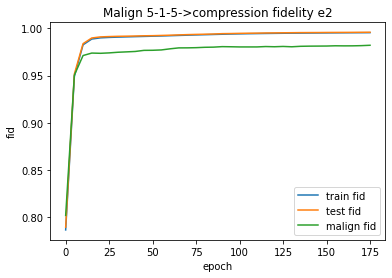

In [28]:
maligig = plt.figure()
plt.plot([x for x in range(0,len(loss_hist)*5,5)],np.array(fid_hist),label="train fid")
plt.plot([x for x in range(0,len(loss_hist)*5,5)],np.array(fid_hist_test),label="test fid")
plt.plot([x for x in range(0,len(loss_hist)*5,5)],np.array(benign_fid),label="malign fid")

plt.legend()
plt.title("Malign 5-1-5->compression fidelity e2",)
plt.xlabel("epoch")
plt.ylabel("fid")

print("fidelity:",fid_hist[-1])

loss: 1.0047297088380356


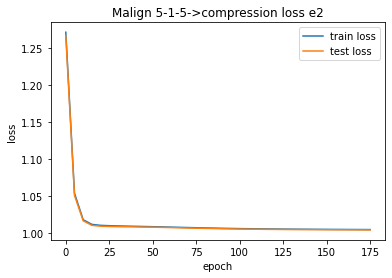

In [29]:
fig = plt.figure()
plt.plot([x for x in range(0,len(loss_hist)*5,5)],np.array(loss_hist),label="train loss")
plt.plot([x for x in range(0,len(loss_hist)*5,5)],np.array(loss_hist_test),label="test loss")


plt.legend()
plt.title("Malign 5-1-5->compression loss e2",)
plt.xlabel("epoch")
plt.ylabel("loss")

print("loss:",loss_hist[-1])

## Benign performance 

In [30]:
np_malign = malign.to_numpy()
malign_data = [ torch.tensor([np_malign[i]]) for i in range(len(malign.to_numpy()))]

loss = cost(encoder_params, malign_data )
fidel = fidelity(encoder_params, malign_data )

print("Benign results:")
print("fidelity=",fidel)
print("loss=",loss)


C:\Users\tomut\anaconda3\envs\qhack2022\lib\site-packages\pennylane\math\multi_dispatch.py:63: UserWarning: Contains tensors of types {'autograd', 'torch'}; dispatch will prioritize TensorFlow and PyTorch over autograd. Consider replacing Autograd with vanilla NumPy.
  warnings.warn(


Benign results:
fidelity= 0.9822167496617882
loss= 1.0183825865172875


## Classifyer

In [31]:
malign_flist=[]
for b in malign_data:
    f=fidelity(encoder_params, [b])
    malign_flist.append(f.item())
    
print(min(malign_flist))
print(max(malign_flist))

0.8734412142326692
0.9970345751891798


In [32]:
np_benign= benign.to_numpy()
benign_data = [ torch.tensor([np_benign[i]]) for i in range(len(benign.to_numpy()))]

In [33]:
benign_flist=[]
for b in benign_data:
    f=fidelity(encoder_params, [b])
    benign_flist.append(f.item())
    
print(min(benign_flist))
print(max(benign_flist))

0.9630419118178796
0.9993572249256


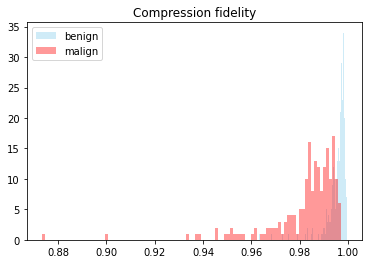

In [34]:
plt.hist(benign_flist, bins = 100 ,label="benign", color = "skyblue",alpha=0.4)
plt.hist(malign_flist, bins =100 ,label="malign",color = "red",alpha=0.4)
plt.title("Compression fidelity",)
plt.legend()
plt.show()

In [37]:
split=0.995


print("split:",split)
b_e=[]
for i in benign_flist:
    if i<split:
        b_e.append(1)
    else:
        b_e.append(0)
ab_ac=sum(b_e)/len(b_e)
print("malign classification accuracy:",ab_ac)
m_e=[]
for i in malign_flist:
    if i>split:
        m_e.append(1)
    else:
        m_e.append(0)
am_ac=sum(m_e)/len(m_e)
print("benign classification accuracy:",am_ac)
t_ac=(sum(b_e)+sum(m_e))/(len(b_e)+len(m_e))
print("total accuracy:",t_ac)

split: 0.995
malign classification accuracy: 0.29180327868852457
benign classification accuracy: 0.07692307692307693
total accuracy: 0.208
